# Backpropagation

## Warm up questions

1. What is a neural network?
2. What is the difference between supervised and unsupervised learning? Give an example of each? Does anyone know an example other than what we have discussed in class for unsupervised learning?
3. What is the activation function we have used for the perceptron and delta rule networks?
4. What role does "error" play in the perceptron and delta learning rules?
5. For a multilayer network how do you know how much of the "error" to pass back into the deeper layers of the network?

Some Answers

1. nodes and edges and a whole bunch of other options.
2. Supervised we are given the desired outputs to learn. Perceptron and Hopfield.
3. Threshold function.
4. It is part of the weight updating equation.
5. That is what we will be working on today.



## Sigmoid Functions

Our prior networks have been forms of threshold units. Check to see if our activation cleared a certain hurdle, and if so set its value to 1 or -1. But it is more common to scale the output continuously between a lower and upper bound. One of the intuitions is that this is like a probability that the neuron might fire.


### What is a sigmoid function and what does it look like?

$\frac{1}{1+e^{-z}}$

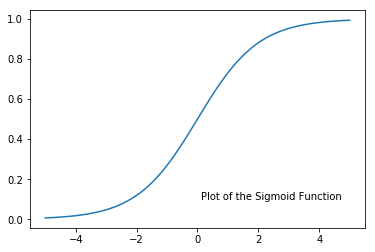

In [19]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as pyp
def sig (z): return 1.0/(1 + np.exp(-1*z))
xs = np.linspace(-5,5,101)
ys = list(map(sig,xs))
pyp.plot(xs,ys)
pyp.text(.1,.1,"Plot of the Sigmoid Function")
pyp.show()


**Map**
Many concepts from functional programming will make your code more readable and concise. Here I use the `map` function to apply a function to all the items in an array. For technical reasons I have to force this to be a list for matplotlib to plot it. But note how much shorter is this than a big for loop.

More details on programming in a functional style in Python 3 can be found [here](https://docs.python.org/3/howto/functional.html).

**A few questions**
   1. Why is it called "sigmoid?"
   2. What advantage does it offer over a threshold function?
   3. Is it the only "sigmoid" function? Does it have other names?
   4. Can you guess an an advantage to this particular form of the equation?
   5. How do use this with a neural network, i.e. what is $z$?


Some Answers

1. S shaped
2. Differentiable
3. No,
![Sigmoid Functions](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Gjl-t%28x%29.svg/1000px-Gjl-t%28x%29.svg.png "Sigmoid Functions Illustrated")
4. The exponential gives it some nice differentiation properties. Can you differentiate it? Go ahead. Why would you care about knowing the derivative?

 What do you need to know?

 a. Differentiate a quotient.

 b. Chain rule.

 c. Derivatives of sums and sums of derivatives

 d. Fancy rearrangements.

 e. The derivative of $e^z$.
5. The weighted input.

How to use it?

Have to input the activation of the neuron into the $z$ of the sigmoid function. That is we need, $\frac{1}{1+e^{-(\sum_i xw)}}$


In [2]:
import numpy as np
x = np.array([1,1])
w = np.array([3,4])
zee = np.dot(x,w)
def sigmoid (xin):
    return(1/(1+np.exp(-xin)))
    

In [5]:
sigmoid(np.dot(x,w))

0.9990889488055994

## Think about equations qualitatively.

Remember, one of the goals of computational modelling is to get insights into the implications of our ideas and theories. Sometimes this means running a model to see what comes out of it. But it can also mean that we look at the equations that go into the model and think about their "behavior" to get some sense of how things will behave that have particular functional forms. 
How might you do that here? Think about how it is the same and differnt from the threshold version. Think about extreme values: what happens at the extremes? Where is the derivative most extreme?  What happens if the dot product of a weight vector and input vector are large? Or very small (and what does small mean here)? What about negative extremes and positive extremes. 



## Why are we starting this discussion of the backpropagation algorithim with all this discussion of activation functions?

1. What is being backpropagated?
2. What is it we want our network to do?
3. How do we guide it?

Answers
1. Cost
2. Move to the point of minimal cost
3. We use the derivative (just like we have all course long).



### What is the cost?

Why use a cost instead of a single classification of right or wrong like we had been doing?
Many networks have a cost function. We may want to know more than just whether you were right or wrong, but how wrong? In a continuous case being "right" might not even really be possible - what is the value of $\pi$" ? Our computers cannot give render sufficient precision. There is not "right" cost function either, but what might you suggest that we use, and why?

What would you suggest as the cost function?


#### Mean Squared Error

It's always a good guess and a resonable starting point

$$C(\mathbf{w}) = \frac{1}{2\mathrm{n}}\sum_\mathbf{x} \|\mathbf{y}(\mathbf{x}) - \mathbf{a}\|^2.$$


Some Questions:
Why isn't this a function of $\mathbf{x}$ and $\mathbf{y}$ too?

What is the /dimensionality/ of the part of the equation inside the double lines? 

What do you call the operation characterized by the double lines? (See "norm" below).

Why is adjusting weights for a multilayer network hard?


Some Answers:
1. It is, but we can't vary those, so we treat them as constants. 

2. the dimensionality is that of the output vector

3. the norm (how big or how far) - think of Hamming distance from the Hopfield network.

4. Because we don't know how to distribute the errors for the intermediate connections. How much /blame/ do we give to each one? 


### Backpropagation 

What do we want? How do we get it?

What do we want? 

To make our network get better; that is to come closer to the "right" answer. Right is in quotes because what is right may be different in different circumstances. This is operator determined.


How do we get it?

1. What is free for us to change?

2. How do we determine if our change is for the better?

3. Can we determine a way to do it that will just work? 


Why can't we just do gradient descent?
(Someone please explain this).
Networks get too big. In theory you could. In practice you can't.



[**Classic Publication** pdf](http://www.nature.com/nature/journal/v323/n6088/pdf/323533a0.pdf)

You can read this article!

You have all the notation, language, and concepts. Note that the abstract makes sense to you. 



Explain backpropagation as a tweet (140 characters or less)

Is backpropagation biologically plausible?

#### Some Notation

$w_{jk}^l$ is the weight between the $kth$ neuron in the $l-1$ layer to the $jth$ neuron in the $lth$ layer. 
Note the ordering of $j's$ and $k's$. It may be backwards from your intuition. 

How would you write as an equation with the "sigma" summation sign the value activation of a single /arbitrary/ neuron in an /arbitrary/ layer of a multi-layer network?

**The activation**
   
$$a^l_j = \sigma \left ( \sum_k w_{jk}^l~a^{l-1}_k \right )$$

   
*** Explain what this means in words.
    Especially the $\sigma$.

Explain what this means with a picture.
Use translation (code:words:pictures) to develop and test your understanding.


Rewrite this equation as a matrix equation

$\sigma(\mathbf{W^l}\vec{a^{l-1}})$ 
Notice that I am "hiding" the bias inside this equation. You have to always have that extra weight and the fixed input activation of $1$ for the bias. 
   


What is the dimension of this "output" and what is the interpretation of the $\sigma$? What is *vectorizing*? From this expression why does it make sense to put the $j$ and $k$ backwards?
Think of the dot product, column vectors, and the way rows and columns match up. All the odd writing is just to make this consistent with compact matrix notation. 

### homework

1. Write a function that given an input vector of activity and a weight matrix computes the new output activation.

2. Write a function to output the derivative of the activity.

Both in Python. They should be free standing functions that you can reuse in code later, i.e. they should start with

`def yourfunction(args):`

  `more stuff here`

In [21]:
a = np.array([0.9,0.8])
ab = np.append(a,1.0)
#what is going on in the line above?

In [39]:
w = np.array([[0.1,-0.25,0.3],[-.4,0.2,0.2],[1.2,2.3,0.03]])
#how many neurons are in this layer?

In [40]:
wtinput = w @ ab
wtinput

array([ 0.19,  0.  ,  2.95])

In [41]:
newa = sig(np.dot(w,ab))
newa

array([ 0.54735762,  0.5       ,  0.95026349])

In [42]:
newa_alt = map(sig, np.dot(w,ab))
newa_alt

In [43]:
list(newa_alt)


[0.54735761814308936, 0.5, 0.95026348844144337]

The *alt*ernative shows you there is more than one way to do things, but that sometimes that can hide complications. Your data has a type that may change depending on how you do things. These later examples use generators and iterators that may take awhile to wrap your head around. 

Remembering "costs"

   $$C = \frac{1}{2n} \sum_x \|y(x) - a^L(x)\|^2$$

   The $L$ became capitalized because this is the "last" layer of a multilayer network. Why are we summing over $x$? What are the $x's$? What does the "[norm](https://en.wikipedia.org/wiki/Norm_(mathematics))" mean again? Size. Think Euclidean. 

### Backpropagation: A pseudo code account

1. Fix the inputs of the first layer to the input pattern $x$.
2. Compute the weighted input to each neuron of the next layer using the input, weights and biases.
3. Compute the weighted cost function error vector for the last layer.
4. Backpropagate the error
5. Use the backpropagated error to update the weights

### Backpropagation: A "stages" account

Feedforward Stage
Backward Pass Stage

Weight Updating Stage

### Warning

Just like we had to watch the parameters carefully in the H and H model, here the trick is to track the dimensions and orientation of your data objects. 

### Understanding why it works

It all comes down to the right way to solve for the weight changes.
What is it we want to change? What are we free to change? 

Write an equation

First step

$$\frac{\partial{C_x}}{\partial{W^{L}_{ji}}}$$

Translate this into words. How would we use this if we knew what it was?

Second step

Substitute and keep doing the chain rule - forever. 
    
$$\frac{\partial{1/2(y - \hat{y})^2}}{\partial{W^{L}_{ij}}}$$ 

What part of this is a function of $W$? Only the $\hat{y}$ (it is common to use a "hat" to reflect that one variable is an estimate of the variable under the hat) depends on the weights, and we use the chain rule.

$$\frac{\partial{1/2(y - \hat{y})^2}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{W^{L}_{ij}}}$$



Third step

To be systematic, let's only consider the last, terminal, also called output layer and denote it $L$.

$$\frac{\partial{1/2(y - \hat{y})^2}}{\partial{\hat{y}}} \frac{\partial{\sigma(z^L_i)}}{\partial{z^L_i}}\frac{\partial{z^L_i}}{\partial{W^{L}_{ij}}}$$



Fourth step

What is $z^L$?

$$\frac{\partial{1/2(y - \hat{y})^2}}{\partial{\hat{y}}} \frac{\partial{\sigma(z^L_i)}}{\partial{z^L_i}}\frac{\partial{\sum_kW^{L}_{ik}~a^{L-1}_k}}{\partial{W^{L}_{ij}}}$$



Fifth step - simplify

$$\frac{\partial{C_x}}{\partial{W^{L}_{ji}}} = (\hat{y} - y)\sigma^\prime(z^L_i)a^{L-1}_j$$



More notation

What part of the above formula is common to all synapses of the output neuron and which is unique for each synapse to the output neuron? Let's denote the common part with a common label $\delta$.

$$\frac{\partial{C_x}}{\partial{W^{L}_{i}}} = \delta^L_i a^{{L-1}^T}$$

And do the same for the next layer



## Making the pieces to solve the XOR problem 

### The key equations

$$   \delta^{\mbox{Last Layer}} = \nabla_a C \circ \sigma^{\prime}(\mbox{weighted inputs}) $$

$$\delta^{\mbox{allOtherLayers}} = (\mbox{weights}^{nextLayer})^T \delta^{\mbox{nextLayer}} \circ \sigma^{\prime}(\mbox{weighted inputs})^{\mbox{currentLayer}}$$

Memory Hint:    $a_{in} \delta^{out}$ 
$$\frac{\partial{C}}{\partial{W_{jk}^l}} = a^{l-1}_k\delta^l_j$$



#### Problem Details

   1. We will use two inputs, at least three hidden units, and one output unit.
   2. Create an input that has each possible input and the proper "class".
   3. Initiate a random weight matrix.
      How do you determine the size?

      How do you represent this in your code? There are matrices and arrays - each has potential advantages.
   4. Calculate cost
   5. Calculate the derivative of the cost.
   6. Calculate sigmoid
   7. Calculate derivative of the sigmoid.
   8. Write a function for the forward pass.
   9. Write a function for the backward pass.
   10. Write a function to update the weights.
   11. Write a function to go through the above for a long time or until you get a good enough approximation.
   12. Rewrite your code to be more general and accept different size inputs and outputs, and to allow for different size hidden layers (and maybe even more hidden layers).
   13. Solve a harder problem
      1. (http://www.cs.utoronto.ca/~kriz/cifar.html)

      2.(http://www.iro.umontreal.ca/~lisa/twiki/bin/view.cgi/Public/BabyAIShapesDatasets)


##### Some Useful Links

There is a very good [online textbook](http://neuralnetworksanddeeplearning.com/chap1.html ) for this material.

And some [nice short videos](https://youtu.be/bxe2T-V8XRs?list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU) too.